In [ ]:
import datetime
import os

import pandas as pd

from src.config import DATA_DIR, MODEL_DIR, PARAM_DIR
from src.recommendation.HPF import train_hpf_model, model_type
from src.recommendation.all_evaluation import _results
from src.recommendation.evaluation import evaluate
from src.recommendation.mixture_functions import get_train
from src.util.data_io import get_hpf_dataset
from src.util.eval_measures import eval_lst
from src.util.io import save_pickle

train_model, model_type = train_hpf_model, model_type


In [3]:
model_type


'hpf_model'

In [4]:
data_dir = os.path.join(DATA_DIR, 'day')
results_dir = os.path.join(MODEL_DIR, 'tuning')


In [5]:
print (eval_lst)


[['recall', [5]], ['precision', [5]], ['nDCG', [5]]]


In [6]:
# subset Jan 20 - 22, 2015
datasets = ['120', '121', '122']


In [7]:
k_vals = [5, 10, 50, 100, 500]


In [8]:
overwrite = False
save_multinomials = True


def hours_minutes_seconds(td):
    return '{:02}:{:02}:{:02}'.format(td.seconds // 3600, (td.seconds // 60) % 60, td.seconds % 60)


In [13]:
def eval_dataset(dataset, k_vals):
    result_dic = {}

    for n_components in k_vals:
        print(n_components)
        train, val, test = get_hpf_dataset(dataset, data_dir)
        start_time = datetime.datetime.now()
        all_multinomials = train_model(train, val, test, results_dir,
                                       dataset, overwrite=False, save_multinomials=True,
                                       n_components=n_components, top_n=10)
        end_time = datetime.datetime.now()
        time_used = hours_minutes_seconds(end_time - start_time)
        print('time_used', time_used)
        dataset, eval_result = _results(dataset, eval_lst, val.values, all_multinomials)
        eval_result.append(['time_used', time_used])
        result_dic.update({n_components: eval_result})

    df = pd.DataFrame(result_dic).T
    df.columns = [item for sublist in list(result_dic.values())[0] for item in sublist[:1]]
    for col in df.columns:
        df[col] = df[col].apply(lambda s: s[1])

    return df



In [14]:
dfs = dict()
for dataset in datasets:
    dataset = str(dataset)
    df = eval_dataset(dataset, k_vals)
    dfs.update({dataset: df})


5
2019-10-22 17:38:17,877 INFO --> Loading data for 120
time_used 00:00:03
recall@5: 0.04903
precision@5: 0.05507
nDCG@5: 0.07063
10
2019-10-22 17:38:59,098 INFO --> Loading data for 120
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3432
Number of items: 29474
Latent factors to use: 10

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Iteration 10 | val llk: -102856 | val rmse: 0.9649
Iteration 20 | val llk: -101928 | val rmse: 0.9644
Iteration 30 | val llk: -101602 | val rmse: 0.9642
Iteration 40 | val llk: -101500 | val rmse: 0.9641
Iteration 50 | val llk: -101438 | val rmse: 0.9641


Optimization finished
Final log-likelihood: -101438
Final RMSE: 0.9641
Minutes taken (optimization part): 0.1

time_used 00:06:09
recall@5: 0.05086
precision@5: 0.05647
nDCG@5: 0.07311
50
2019-10-22 17:45:45,184 INFO --> Loading data for 120
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3432
Number of items: 29474
Latent factors to use: 50

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -93986 | val rmse: 1.0031
Iteration 20 | val llk: -92832 | val rmse: 1.0581
Iteration 30 | val llk: -92714 | val rmse: 1.0996
Iteration 40 | val llk: -92665 | val rmse: 1.1131


Optimization finished
Final log-likelihood: -92665
Final RMSE: 1.1131
Minutes taken (optimization part): 0.4

time_used 00:05:47
recall@5: 0.06694
precision@5: 0.07512
nDCG@5: 0.09899
100
2019-10-22 17:52:09,788 INFO --> Loading data for 120
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3432
Number of items: 29474
Latent factors to use: 100

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -89976 | val rmse: 1.0294
Iteration 20 | val llk: -89373 | val rmse: 1.1345
Iteration 30 | val llk: -89504 | val rmse: 1.1665


Optimization finished
Final log-likelihood: -89504
Final RMSE: 1.1665
Minutes taken (optimization part): 0.4

time_used 00:05:46
recall@5: 0.08155
precision@5: 0.09062
nDCG@5: 0.11894
500
2019-10-22 17:58:32,984 INFO --> Loading data for 120
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3432
Number of items: 29474
Latent factors to use: 500

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -81360 | val rmse: 1.2401
Iteration 20 | val llk: -81868 | val rmse: 1.2640


Optimization finished
Final log-likelihood: -81868
Final RMSE: 1.2640
Minutes taken (optimization part): 0.8

time_used 00:05:11
recall@5: 0.09969
precision@5: 0.11259
nDCG@5: 0.15027
5
2019-10-22 18:04:21,898 INFO --> Loading data for 121
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3641
Number of items: 30195
Latent factors to use: 5

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Iteration 10 | val llk: -118464 | val rmse: 0.9676
Iteration 20 | val llk: -117897 | val rmse: 0.9672
Iteration 30 | val llk: -117675 | val rmse: 0.9672
Iteration 40 | val llk: -117627 | val rmse: 0.9673


Optimization finished
Final log-likelihood: -117627
Final RMSE: 0.9673
Minutes taken (optimization part): 0.1

time_used 00:04:04
recall@5: 0.04959
precision@5: 0.05581
nDCG@5: 0.07323
10
2019-10-22 18:09:07,519 INFO --> Loading data for 121
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3641
Number of items: 30195
Latent factors to use: 10

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Iteration 10 | val llk: -114798 | val rmse: 0.9709
Iteration 20 | val llk: -113752 | val rmse: 0.9753
Iteration 30 | val llk: -113430 | val rmse: 0.9776
Iteration 40 | val llk: -113329 | val rmse: 0.9791


Optimization finished
Final log-likelihood: -113329
Final RMSE: 0.9791
Minutes taken (optimization part): 0.1

time_used 00:04:16
recall@5: 0.05243
precision@5: 0.05932
nDCG@5: 0.07750
50
2019-10-22 18:14:03,222 INFO --> Loading data for 121
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3641
Number of items: 30195
Latent factors to use: 50

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -104641 | val rmse: 0.9830
Iteration 20 | val llk: -103173 | val rmse: 1.0116
Iteration 30 | val llk: -102910 | val rmse: 1.0332
Iteration 40 | val llk: -102878 | val rmse: 1.0576


Optimization finished
Final log-likelihood: -102878
Final RMSE: 1.0576
Minutes taken (optimization part): 0.3

time_used 00:05:09
recall@5: 0.06778
precision@5: 0.07696
nDCG@5: 0.10014
100
2019-10-22 18:19:52,553 INFO --> Loading data for 121
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3641
Number of items: 30195
Latent factors to use: 100

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -100273 | val rmse: 1.0116
Iteration 20 | val llk: -99399 | val rmse: 1.1155
Iteration 30 | val llk: -99533 | val rmse: 1.1614


Optimization finished
Final log-likelihood: -99533
Final RMSE: 1.1614
Minutes taken (optimization part): 0.4

time_used 00:04:45
recall@5: 0.08937
precision@5: 0.10426
nDCG@5: 0.13334
500
2019-10-22 18:25:19,766 INFO --> Loading data for 121
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3641
Number of items: 30195
Latent factors to use: 500

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -90386 | val rmse: 1.0888
Iteration 20 | val llk: -91086 | val rmse: 1.1760


Optimization finished
Final log-likelihood: -91086
Final RMSE: 1.1760
Minutes taken (optimization part): 0.7

time_used 00:04:51
recall@5: 0.10102
precision@5: 0.11903
nDCG@5: 0.15303
5
2019-10-22 18:30:51,317 INFO --> Loading data for 122
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3591
Number of items: 30106
Latent factors to use: 5

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Iteration 10 | val llk: -116322 | val rmse: 0.9651
Iteration 20 | val llk: -115604 | val rmse: 0.9647
Iteration 30 | val llk: -115428 | val rmse: 0.9646
Iteration 40 | val llk: -115375 | val rmse: 0.9645


Optimization finished
Final log-likelihood: -115375
Final RMSE: 0.9645
Minutes taken (optimization part): 0.1

time_used 00:03:52
recall@5: 0.05094
precision@5: 0.05803
nDCG@5: 0.07483
10
2019-10-22 18:35:22,336 INFO --> Loading data for 122
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3591
Number of items: 30106
Latent factors to use: 10

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Iteration 10 | val llk: -112782 | val rmse: 0.9739
Iteration 20 | val llk: -111599 | val rmse: 0.9871
Iteration 30 | val llk: -111231 | val rmse: 0.9979
Iteration 40 | val llk: -111130 | val rmse: 1.0061


Optimization finished
Final log-likelihood: -111130
Final RMSE: 1.0061
Minutes taken (optimization part): 0.1

time_used 00:03:53
recall@5: 0.05508
precision@5: 0.06321
nDCG@5: 0.08271
50
2019-10-22 18:39:56,541 INFO --> Loading data for 122
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3591
Number of items: 30106
Latent factors to use: 50

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -102459 | val rmse: 0.9774
Iteration 20 | val llk: -100989 | val rmse: 1.0128
Iteration 30 | val llk: -100785 | val rmse: 1.0515
Iteration 40 | val llk: -100748 | val rmse: 1.0814


Optimization finished
Final log-likelihood: -100748
Final RMSE: 1.0814
Minutes taken (optimization part): 0.3

time_used 00:04:18
recall@5: 0.07307
precision@5: 0.08248
nDCG@5: 0.10925
100
2019-10-22 18:44:55,598 INFO --> Loading data for 122
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3591
Number of items: 30106
Latent factors to use: 100

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -98448 | val rmse: 1.0398
Iteration 20 | val llk: -97545 | val rmse: 1.1141
Iteration 30 | val llk: -97615 | val rmse: 1.1400


Optimization finished
Final log-likelihood: -97615
Final RMSE: 1.1400
Minutes taken (optimization part): 0.3

time_used 00:04:16
recall@5: 0.08746
precision@5: 0.10114
nDCG@5: 0.12982
500
2019-10-22 18:49:52,681 INFO --> Loading data for 122
**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 3591
Number of items: 30106
Latent factors to use: 500

Initializing parameters...


/home/yueliu/anaconda3/lib/python3.6/site-packages/hpfrec/__init__.py:539: UserWarning: 'val_set' contains observations with a count value less than 1, these will be ignored.
  warnings.warn(msg)


Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | val llk: -89140 | val rmse: 1.2012
Iteration 20 | val llk: -89676 | val rmse: 1.2427


Optimization finished
Final log-likelihood: -89676
Final RMSE: 1.2427
Minutes taken (optimization part): 0.7

time_used 00:05:03
recall@5: 0.10674
precision@5: 0.12671
nDCG@5: 0.16704


In [15]:
eval_measure = df.columns.tolist()
eval_measure


['recall@5', 'precision@5', 'nDCG@5', 'time_used']

In [16]:
def plot_metric(col):
    try:
        df_plot = pd.DataFrame({c: df[col] for c, df in dfs.items()})
        df_plot.plot(logx=True, xticks=k_vals, title=col.upper() + ' for different k')
    except:
        # time is not numeric value
        return df_plot


In [17]:
for k, df in dfs.items():
    print(k)
    print(df['nDCG@5'].idxmax())


120
500
121
500
122
500


          120       121       122
5    00:00:03  00:04:04  00:03:52
10   00:06:09  00:04:16  00:03:53
50   00:05:47  00:05:09  00:04:18
100  00:05:46  00:04:45  00:04:16
500  00:05:11  00:04:51  00:05:03


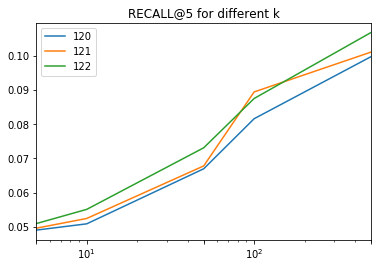

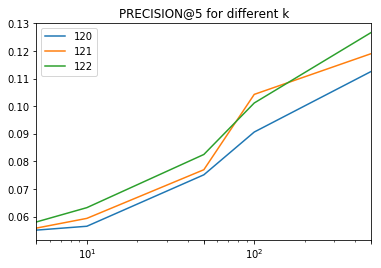

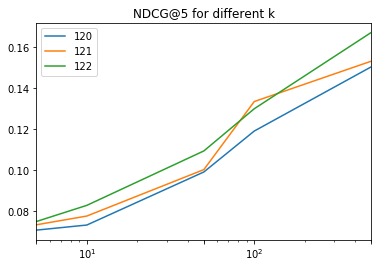

In [18]:
for col in eval_measure:
    df_time = plot_metric(col)
print (df_time)


In [20]:
save_pickle(os.path.join(PARAM_DIR, model_type), 500, False)
